In [152]:
import math
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [153]:
theoretical_matrix = np.array([
    [0.01, 0.01, 0.02, 0.02, 0.01],
    [0.04, 0.3, 0.06, 0.03, 0.01],
    [0.02, 0.03, 0.06, 0.07, 0.05],
    [0.05, 0.03, 0.04, 0.02, 0.03],
    [0.03, 0.02, 0.01, 0.01, 0.02]
])

theoretical_X = np.array([1, 2, 3, 4, 5])
theoretical_Y = np.array([6, 7, 8, 9, 10])
n,m = 5,5

In [154]:
count = 1000

q = theoretical_matrix.sum(axis=0)
r = theoretical_matrix.sum(axis=1)


def generate_estimate(axis):
    l = [0]
    for i in range(len(axis)):
        l.append(l[i]+axis[i])
    return l


def generate_sample(k, l, s):
    sample = [[0] * 2 for i in range(k)]
    for _ in range(k):
        r_val = np.random.uniform(0,1)
        for i in range(len(l)-1):
            if l[i] < r_val < l[i+1]:
                sample[_][0] = i+1
                for j in range(len(s)-1):
                    if s[j] < r_val < s[j+1]:
                        sample[_][1] = j+1
                        break
                break
    return sample


def point_estimate_math_mean(sample):
    return sum(sample) / len(sample)


def point_estimate_variance(sample):
    mean = point_estimate_math_mean(sample)
    result = 0.0
    for element in sample:
        result += (element - mean) ** 2
    return result / (len(sample) - 1)


def confidence_interval_math_mean(sample, significance_level):
    standard_deviation = np.sqrt(point_estimate_variance(sample))
    u_coefficient = stats.norm.ppf(1 - significance_level / 2)
    epsilon = standard_deviation * u_coefficient / np.sqrt(len(sample))
    return -epsilon, epsilon


def confidence_interval_variance(sample, significance_level):
    left_chi_coefficient = stats.chi2.ppf(1 - significance_level / 2, n - 1)
    right_chi_coefficient = stats.chi2.ppf(significance_level / 2, n - 1)
    est_variance = point_estimate_variance(sample)
    epsilon = (n - 1) * est_variance
    return epsilon / left_chi_coefficient, epsilon / right_chi_coefficient

In [ ]:
def print_hist(sample, component_name):
    plt.hist(sample)
    plt.title("Histogram of" + component_name + "component of DRV")
    plt.xlabel("Value")
    plt.ylabel("Amount")
    plt.legend((component_name + " component", ''))
    plt.show()


def print_hot_map(sample_x, sample_y):
    hist, x_edges, y_edges = np.histogram2d(sample_x, sample_y)
    hist = hist.T
    x, y = np.meshgrid(x_edges, y_edges)
    plt.pcolormesh(x, y, hist)
    plt.show()

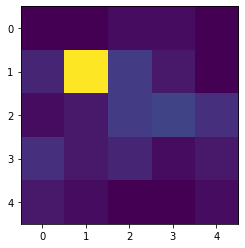

In [155]:
plt.imshow(theoretical_matrix)

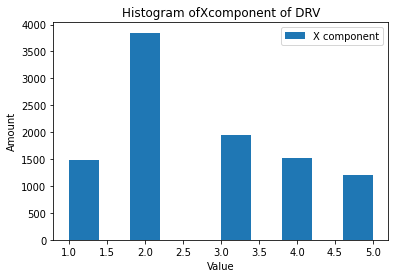

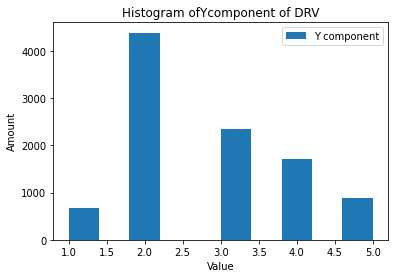

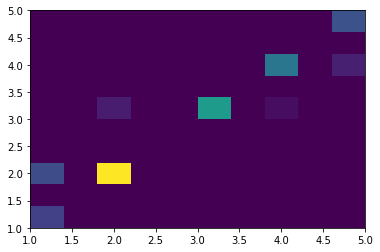

In [156]:
l_q = generate_estimate(q)
l_r = generate_estimate(r)

P = generate_sample(10000, l_q, l_r)

x_sample = [i[0] for i in P]
y_sample = [i[1] for i in P]

In [ ]:
print_hist(x_sample,"X")
print_hist(y_sample,"Y")
print_hot_map(x_sample, y_sample)

In [157]:
print('Для точечных оценок матожидания используем выборочное среднее:')
M_X = point_estimate_math_mean(x_sample)
print(f'M[X]={M_X}')
M_Y = point_estimate_math_mean(y_sample)
print(f'M[Y]={M_Y}')

print('Для точечных оценок дисперсии используем исправленную выборочную дисперсию:')
D_X = point_estimate_variance(x_sample)
print(f'D[X]={D_X}')
D_Y = point_estimate_variance(y_sample)
print(f'D[Y]={D_Y}')

print('Доверительный интервал для матожидания при уровне значимости 0.01:')
M_X_tuple = confidence_interval_math_mean(x_sample, 0.01)
print(f'[{M_X + M_X_tuple[0]}; {M_X + M_X_tuple[1]}]')
M_Y_tuple = confidence_interval_math_mean(y_sample, 0.01)
print(f'[{M_Y + M_Y_tuple[0]}; {M_Y + M_Y_tuple[1]}]')

print('Доверительный интервал для дисперсии при уровне значимости 0.01:')
D_X_tuple = confidence_interval_variance(x_sample, 0.01)
print(f'[{ D_X_tuple[0]}; {D_X + D_X_tuple[1]}]')
D_Y_tuple = confidence_interval_variance(y_sample, 0.01)
print(f'[{D_Y + D_Y_tuple[0]}; {D_Y + D_Y_tuple[1]}]')

Для точечных оценок матожидания используем выборочное среднее:
M[X]=2.7093
M[Y]=2.7767
Для точечных оценок дисперсии используем исправленную выборочную дисперсию:
D[X]=1.5303465446545033
D[Y]=1.1847555855585785
Доверительный интервал для матожидания при уровне значимости 0.01:
[2.677435143045178; 2.7411648569548217]
[2.748663005140237; 2.8047369948597627]
Доверительный интервал для дисперсии при уровне значимости 0.01:
[0.41192997903921; 31.10381863066528]
[1.5036613557780376; 24.079789629087678]
